In [76]:
%pylab inline

import os

from ros2profile.api.process import load_mcap_data

matplotlib.pyplot DEBUG Loaded backend module://matplotlib_inline.backend_inline version unknown.


Populating the interactive namespace from numpy and matplotlib


In [77]:
PROFILE_RUN = os.path.expanduser('~/.ros/profile/reference_system-20230310113449/')

topnode_data = load_mcap_data(PROFILE_RUN)

In [78]:
recorded_processes = list(topnode_data.keys())

cpu_per_proc = {}
memory_per_proc = {}

for proc in recorded_processes:
    s = proc.split('_')
    proc_name = '_'.join(s[0:-1])
    proc_pid = int(s[-1])
    print(f'Process: {proc_name} ({proc_pid})')
    recorded_msgs = topnode_data[recorded_processes[0]]
    for msg in recorded_msgs.keys():
        print(f' * {msg} ({len(recorded_msgs[msg])} msgs)')

Process: reference_system_robot (1333493)
 * ~/cpu_memory_usage (137 msgs)
 * ~/memory_state (137 msgs)
 * ~/io_stats (137 msgs)
 * ~/stat (137 msgs)
Process: reference_system_control (1333495)
 * ~/cpu_memory_usage (137 msgs)
 * ~/memory_state (137 msgs)
 * ~/io_stats (137 msgs)
 * ~/stat (137 msgs)


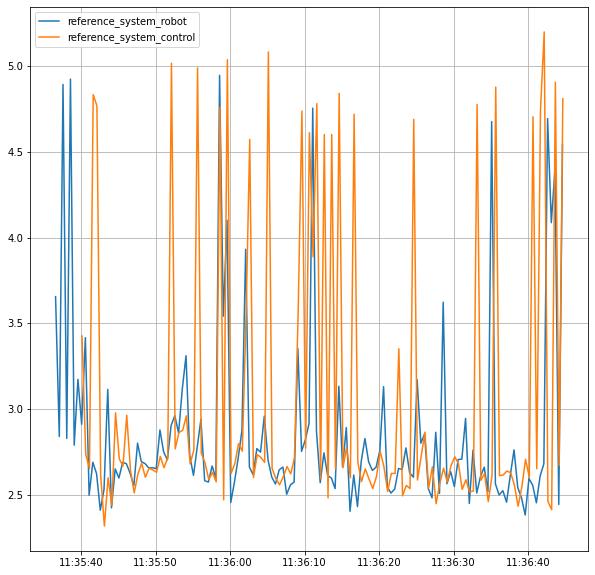

In [79]:
plt.figure(figsize=(10,10))
plt.grid(True)

for proc in recorded_processes:
    s = proc.split('_')
    proc_name = '_'.join(s[0:-1])
    proc_pid = int(s[-1])
    
    cpu_memory_usage = topnode_data[proc]['~/cpu_memory_usage']
    plt.plot(cpu_memory_usage._log_time, cpu_memory_usage.cpu_percent, label=proc_name)
    
plt.legend()

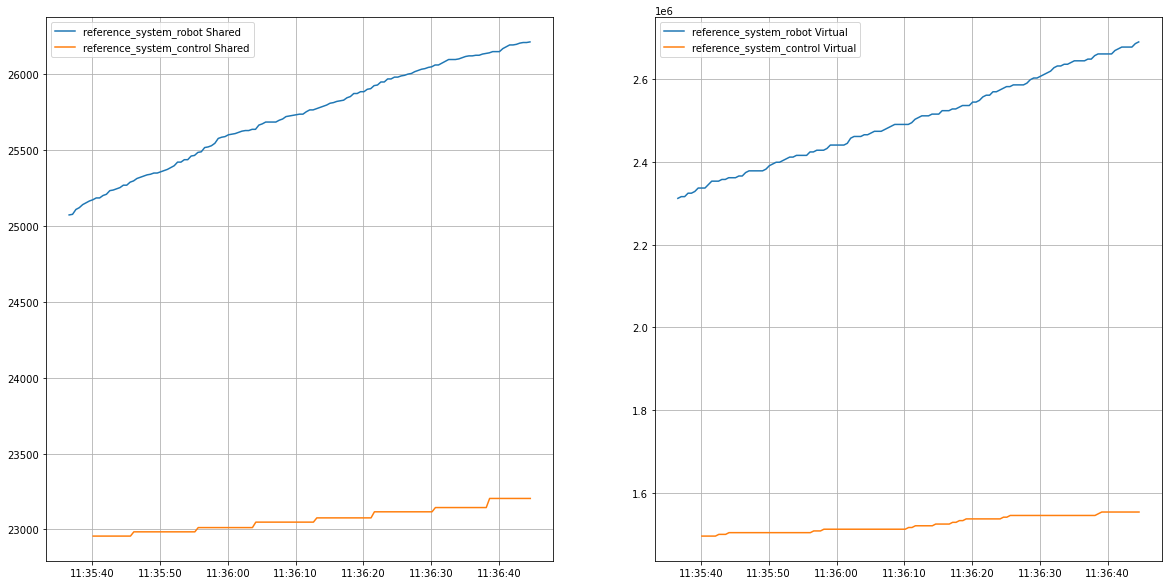

In [80]:
plt.figure(figsize=(20,10))

for proc in recorded_processes:
    s = proc.split('_')
    proc_name = '_'.join(s[0:-1])
    proc_pid = int(s[-1])
    
    cpu_memory_usage = topnode_data[proc]['~/cpu_memory_usage']
    plt.subplot(121)
    plt.plot(cpu_memory_usage._log_time, cpu_memory_usage.shared_size, label=f'{proc_name} Shared')
    plt.subplot(122)
    plt.plot(cpu_memory_usage._log_time, cpu_memory_usage.virtual_size, label=f'{proc_name} Virtual')


plt.subplot(121)
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.grid(True)
plt.legend()


In [81]:
cpu_memory_usage.virtual_size

0      1494564
1      1494564
2      1494564
3      1494564
4      1494564
        ...   
125    1552804
126    1552804
127    1552804
128    1552804
129    1552804
Name: virtual_size, Length: 130, dtype: int64